In [1]:
import keras
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dim=10000):
    result = np.zeros((len(sequences), dim))
    for idx, sequence in enumerate(sequences):
        result[idx, sequence] = 1.
    return result

# Vectorize input data, one-hot encoding.

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Using TensorFlow backend.


In [2]:
from keras import models
from keras import layers
from keras import regularizers

# Apply weight regularization to the loss function.
# L2 regularization add penalty that is elementwise square x factor to weight matrix.

ndim = 10000

model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                       activation='relu',input_shape=(ndim,)))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                       activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [3]:
# First 10000 samples are used for validation.

nsample = 10000

partial_train_input = x_train[nsample:]
partial_train_labels = y_train[nsample:]

val_input = x_train[:nsample]
val_labels = y_train[:nsample]

In [4]:
# Compile a model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_train_input, partial_train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_data=(val_input, val_labels))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 153us/step - loss: 0.5515 - acc: 0.7812 - val_loss: 0.4255 - val_acc: 0.8667
Epoch 2/20
15000/15000 [==============================] - 2s 101us/step - loss: 0.3541 - acc: 0.9037 - val_loss: 0.3517 - val_acc: 0.8892
Epoch 3/20
15000/15000 [==============================] - 2s 106us/step - loss: 0.2833 - acc: 0.9229 - val_loss: 0.3677 - val_acc: 0.8698
Epoch 4/20
15000/15000 [==============================] - 2s 108us/step - loss: 0.2519 - acc: 0.9359 - val_loss: 0.3335 - val_acc: 0.8878
Epoch 5/20
15000/15000 [==============================] - 2s 108us/step - loss: 0.2321 - acc: 0.9415 - val_loss: 0.3340 - val_acc: 0.8869
Epoch 6/20
15000/15000 [==============================] - 2s 109us/step - loss: 0.2126 - acc: 0.9507 - val_loss: 0.4048 - val_acc: 0.8619
Epoch 7/20
15000/15000 [==============================] - 2s 107us/step - loss: 0.2030 - acc: 0.9535 - val_loss: 0.3503 - 

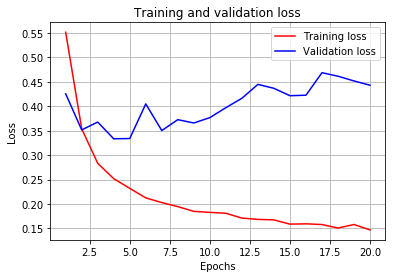

In [8]:
# Visualize training and validation loss each iteration.

import matplotlib.pyplot as plt

history_dict = history.history
train_loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = np.arange(len(train_loss)) + 1

# Model is overfitting after epoch=6.

plt.figure('Visualize training and validation loss')
plt.title('Training and validation loss')
plt.plot(epochs, train_loss, color='r', label='Training loss')
plt.plot(epochs, val_loss, color='b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

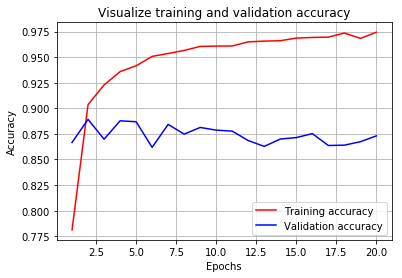

In [9]:
# Visualize training and validation accuracy each iteration.

train_acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.figure('Visualize training and validation accuracy')
plt.title('Visualize training and validation accuracy')
plt.plot(epochs, train_acc, color='r', label='Training accuracy')
plt.plot(epochs, val_acc, color='b', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()
plt.show()

In [11]:
# Release a gpu resource.
from keras import backend as K

K.clear_session()